In [1]:
from IPython.display import Image

-------------------------------
### overview of SVMs
--------------------------------

#### classes of data

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Number of data points per class
num_points = 50

In [4]:
# Generate data for Class 0
class_0_data = np.random.normal(loc=[2, 2], scale=1, size=(num_points, 2))
class_0_labels = np.zeros(num_points)  # Class 0 labels

In [5]:
# Generate data for Class 1
class_1_data = np.random.normal(loc=[5, 5], scale=1, size=(num_points, 2))
class_1_labels = np.ones(num_points)  # Class 1 labels

In [6]:
# Combine data from both classes
all_data   = np.vstack((class_0_data, class_1_data))
all_labels = np.hstack((class_0_labels, class_1_labels))

In [7]:
all_labels.astype('int')

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

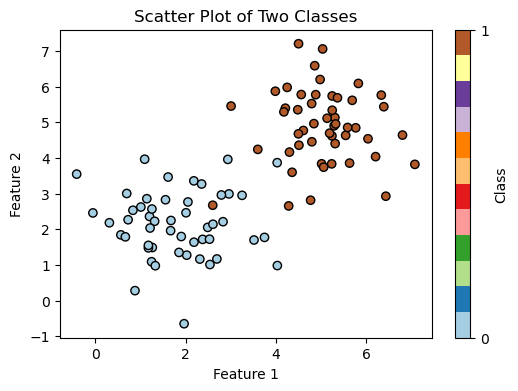

In [7]:
# Create a scatter plot to visualize the two classes
plt.figure(figsize=(6, 4))
plt.scatter(all_data[:, 0], all_data[:, 1], c=all_labels, cmap=plt.cm.Paired, marker='o', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Scatter Plot of Two Classes")
plt.colorbar(ticks=[0, 1], label="Class");

#### find class separation
- decision boundary
- line of separation (2D)
- plane of separation (more than 3D)
- hyperplane

In [8]:
#!pip install mlxtend

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.plotting import plot_decision_regions

In [9]:
# Define the classifiers
classifiers = [KNeighborsClassifier(n_neighbors=3),
               LogisticRegression(),
               DecisionTreeClassifier(),
               RandomForestClassifier(n_estimators=100, random_state=0)]

D:\Anaconda-16-FEB\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


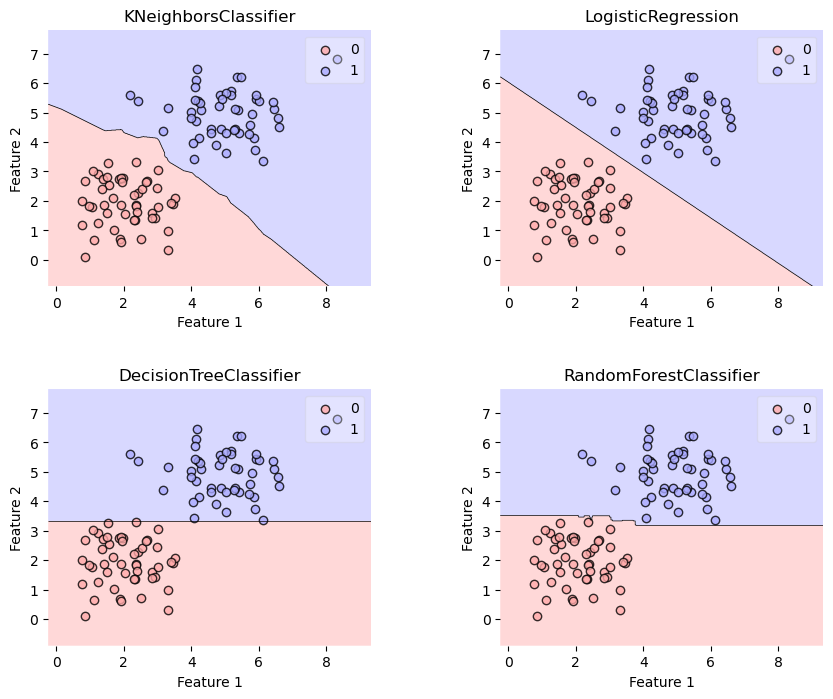

In [10]:
# Set up the figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

for i, clf in enumerate(classifiers):
    ax = axes[i // 2, i % 2]
    
    # Fit the classifier
    clf.fit(all_data, all_labels)
    
    # Plot decision boundary using mlxtend
    plot_decision_regions(all_data, 
                          all_labels.astype('int'), 
                          clf    = clf, 
                          ax     = ax, 
                          markers= 'o', 
                          colors = '#FFAAAA,#AAAAFF')
    
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_title(clf.__class__.__name__)

#### see the performance of SVM

In [11]:
from sklearn.svm import SVC

In [12]:
# Create an SVM classifier (SVC)
svm_classifier = SVC(kernel='linear', C=1.0)

In [13]:
# Fit the classifier to the data
svm_classifier.fit(all_data, all_labels)

SVC(kernel='linear')

Text(0.5, 1.0, 'SVM Decision Boundary')

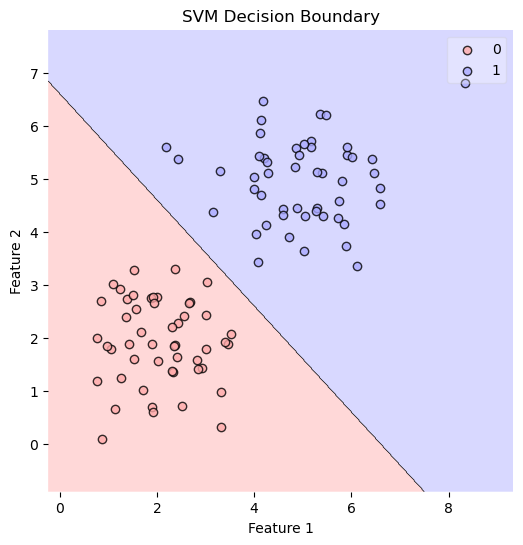

In [14]:
# Set up the figure
fig, ax = plt.subplots(figsize=(6, 6))

# Plot decision boundary using mlxtend
plot_decision_regions(all_data, 
                      all_labels.astype('int'), 
                      clf=svm_classifier, 
                      ax=ax, 
                      markers='o', 
                      colors='#FFAAAA,#AAAAFF')

# Plot the data points
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_title("SVM Decision Boundary")

In some cases, the decision boundaries produced by Support Vector Machines (SVM) and Logistic Regression (Logistic Reg) may appear similar, especially when both models are applied to relatively simple or linearly separable datasets. 

However, it's important to understand the key differences between these two classifiers and when they are likely to produce different decision boundaries:

#### plot the margin in case SVM

In [15]:
# Create an SVM classifier (SVC)
svm_classifier = SVC(kernel='linear', C=1.0)

In [16]:
# Fit the classifier to the data
svm_classifier.fit(all_data, all_labels)

SVC(kernel='linear')

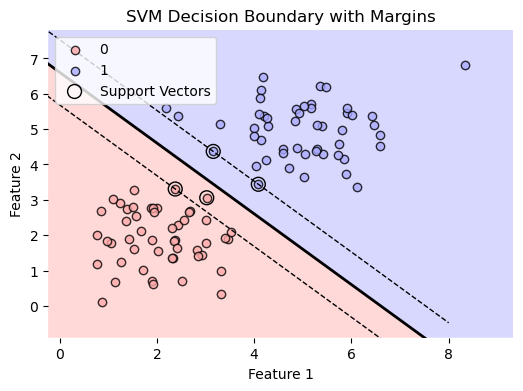

In [17]:
# Set up the figure
fig, ax = plt.subplots(figsize=(6, 4))

# Plot decision boundary using mlxtend
plot_decision_regions(all_data, all_labels.astype('int'), clf=svm_classifier, ax=ax, markers='o', colors='#FFAAAA,#AAAAFF')

# Plot the support vectors
plt.scatter(svm_classifier.support_vectors_[:, 0], svm_classifier.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label='Support Vectors')

# Plot the margin boundaries
margin = 1 / np.sqrt(np.sum(svm_classifier.coef_ ** 2))
xx, yy = np.meshgrid(np.linspace(-1, 8, 400), np.linspace(-1, 8, 400))
decision_boundary = svm_classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
decision_boundary = decision_boundary.reshape(xx.shape)
ax.contour(xx, yy, decision_boundary, levels=[-1, 0, 1], colors='k', linestyles=['--', '-', '--'], linewidths=[1, 2, 1])

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_title("SVM Decision Boundary with Margins")

# Show the plot
plt.legend();

#### history

In [28]:
#Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\svm-00.JPG', width=800)

In [18]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [19]:
X, y = make_blobs(n_samples=200, 
                  centers=2,
                  random_state=0, 
                  cluster_std=.5)

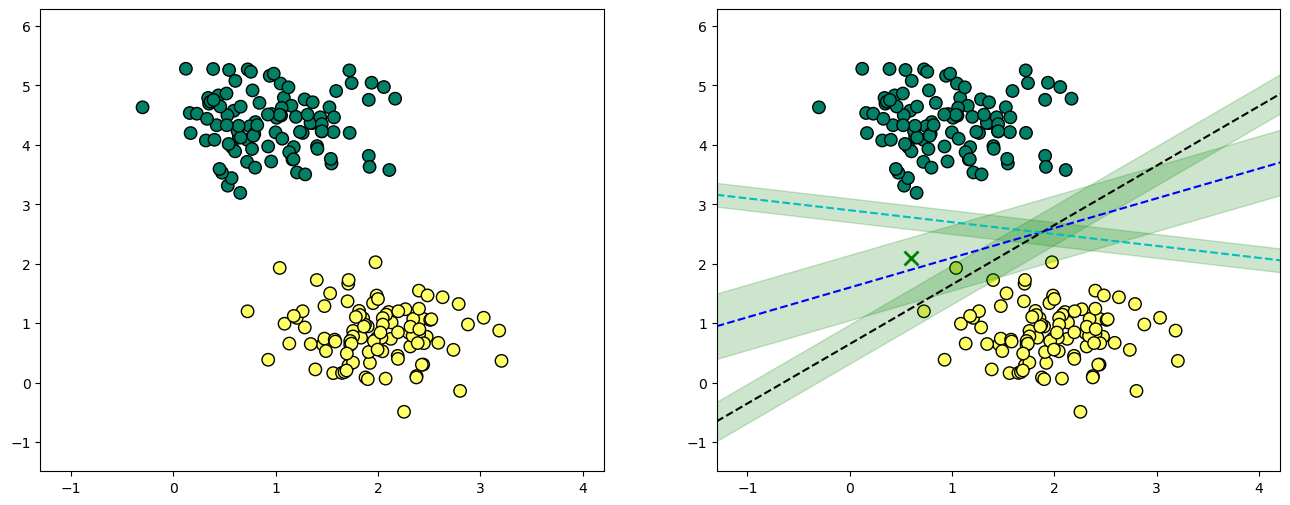

In [20]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)

# plot the training points
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=y, 
            s=80, 
            marker='o',
            edgecolors='k',
            cmap='summer')

plt.xlim(np.min(X[:, 0])-1, np.max(X[:, 0])+1)
plt.ylim(np.min(X[:, 1])-1, np.max(X[:, 1])+1)

# Plot with dummy separators
plt.subplot(1, 2, 2)

# some points on the x axis
x_points = np.linspace(np.min(X[:, 0])-1, np.max(X[:, 0])+1)

# plot the training points
plt.scatter(X[:, 0], 
            X[:, 1], 
            c=y, 
            s=80, 
            marker='o',
            edgecolors='k',
            cmap='summer')

# some test point
plt.plot([0.6], [2.1], 'x', color='green', markeredgewidth=2, markersize=10)

for m, b, d, c in [(1,    0.65, 0.33,  'k'), 
                   (0.5,  1.6,  0.55, 'b'), 
                   (-0.2, 2.9,  0.2, 'c')]:
    
    y_points = m * x_points + b
    
    plt.plot(x_points, y_points, c, linestyle='--')
    plt.fill_between(x_points, y_points - d, y_points + d, edgecolor='none', color='g', alpha=0.2)

plt.xlim(np.min(X[:, 0])-1, np.max(X[:, 0])+1)
plt.ylim(np.min(X[:, 1])-1, np.max(X[:, 1])+1);

- In support vector machines, the line that maximizes this margin is the one we will choose as the optimal model. This is also called a __maximum margin classifier__.

- These are 3 different separators which, nevertheless, perfectly discriminate between these samples. 

    - Depending on which separator we choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label! 

    - Evidently our simple intuition of "drawing a line between classes" is not enough, and we need a better solution

    - Support vector machines offer one way to improve on this. 
        - The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a __margin of MAXIMUM width__, up to the nearest points.

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
def plot_lr(n_samples,  cluster_std_dev, ax=None):

    X, y = make_blobs(n_samples   =n_samples, 
                      centers     =2,
                      random_state=0, 
                      cluster_std =cluster_std_dev)

    model = LogisticRegression(solver='lbfgs')
    model.fit(X, y)

    # create grid to evaluate model
    x_points = np.linspace(np.min(X[:, 0])-1, np.max(X[:, 0])+1, 300)
    y_points = np.linspace(np.min(X[:, 1])-1, np.max(X[:, 1])+1, 300)
    
    yy, xx   = np.meshgrid(y_points, x_points)

    # predict for each grid point
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])

    # reshape into 2D
    Z = Z.reshape(xx.shape)
    
    ax = ax or plt.gca()

    # plot decision boundary and margins
    ax.pcolormesh(xx, yy, Z > 0, cmap=plt.cm.Accent, shading='auto')

    # plot all the training samples
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='autumn', edgecolors='k')

    ax.contour(xx, yy, Z, 
                colors='k',
                levels=[-1, 0, 1], 
                alpha=0.9,
                linestyles=['--', '-', '--'],
                )
    plt.show()


In [23]:
from ipywidgets import interact, fixed, widgets

interact(plot_lr, 
         n_samples      = widgets.IntSlider(min=10, max=2000, step=5, value=10), 
         cluster_std_dev= widgets.FloatSlider(min=0.1, max=5, step=.1, value=1), 
         ax=fixed(None));

interactive(children=(IntSlider(value=10, description='n_samples', max=2000, min=10, step=5), FloatSlider(valu…

Observe the change in the line of separation

- Uses the `support vectors`, ignoring other training examples
- Helps generalize the predictions and perform better on the test data by `not overfitting` the model to the training data

In [24]:
from sklearn.svm import SVC

In [25]:
global X, y 

In [26]:
X, y = make_blobs(n_samples=200, 
                  centers=2,
                  random_state=0, 
                  cluster_std=.5)

In [27]:
def plot_svm(n_samples, ax=None):
            
    X1 = X[:n_samples]
    y1 = y[:n_samples]

    model = SVC(kernel='linear')
    #model = RandomForestClassifier()
    model.fit(X1, y1)

    # create grid to evaluate model
    x_points = np.linspace(np.min(X1[:, 0])-1, np.max(X1[:, 0])+1, 300)
    y_points = np.linspace(np.min(X1[:, 1])-1, np.max(X1[:, 1])+1, 300)
    
    yy, xx   = np.meshgrid(y_points, x_points)

    # predict for each grid point
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])

    # reshape into 2D
    Z = Z.reshape(xx.shape)
    
    ax = ax or plt.gca()

    # plot decision boundary and margins
    ax.pcolormesh(xx, yy, Z > 0, cmap=plt.cm.Accent, shading='auto')

    # plot all the training samples
    ax.scatter(X1[:, 0], X1[:, 1], c=y1, s=25, cmap='autumn', edgecolors='k')

    ax.contour(xx, yy, Z, 
                colors='k',
                levels=[-1, 0, 1], 
                alpha=0.9,
                linestyles=['--', '-', '--'],
                )

    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0],
               model.support_vectors_[:, 1],
                s=60, 
                facecolors='white',
                edgecolors='k');

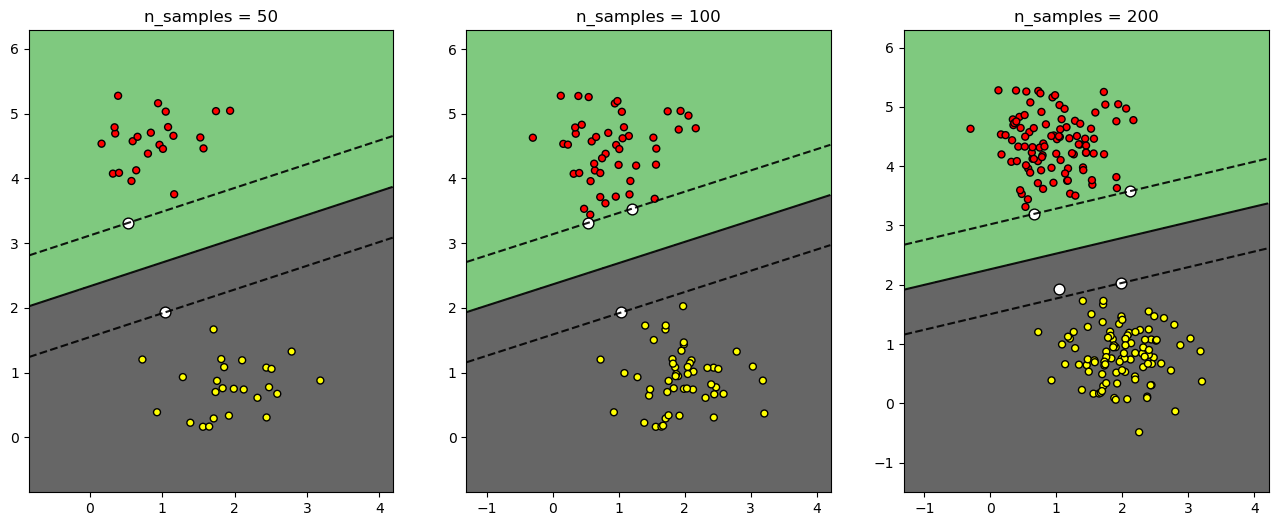

In [28]:
fig, ax = plt.subplots(1, 3, figsize=(16, 6))
for axi, n_samples in zip(ax, [50, 100, 200]):  
    axi.set_title('n_samples = {0}'.format(n_samples))  
    plot_svm(n_samples, axi)

In [29]:
from ipywidgets import interact, fixed, widgets

interact(plot_svm, n_samples=widgets.IntSlider(min=10, max=2000, step=5, value=10), ax=fixed(None));

interactive(children=(IntSlider(value=10, description='n_samples', max=2000, min=10, step=5), Output()), _dom_…

#### But what happens when there is no clear hyperplane?

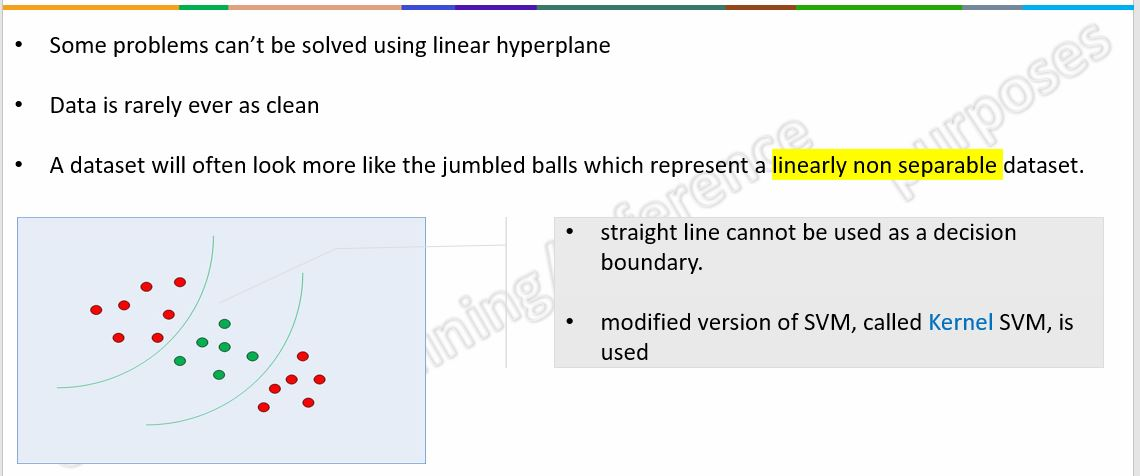

In [54]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\svm-05.JPG', width=800)

- Basically, the kernel SVM `projects` the non-linearly separable data lower dimensions to linearly separable data in higher dimensions 

- data points belonging to different classes are allocated to different dimensions. 

- there is `complex mathematics` involved in this, 


#### An Example ... 2D to 3D

- In order to classify a dataset like the previous case it’s necessary to move away from a 2d view of the data to a 3d view. 
- Imagine that our 2 sets of colored balls above are sitting on a sheet and this sheet is lifted suddenly, launching the balls into the air. 
- While the balls are up in the air, you use the sheet to separate them. 
- This ‘lifting’ of the balls represents the mapping of data into a higher dimension. This is known as kernelling.

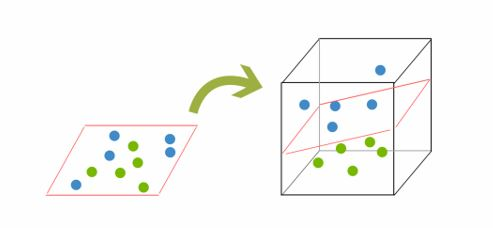

In [57]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\svm-06.JPG', width=400)

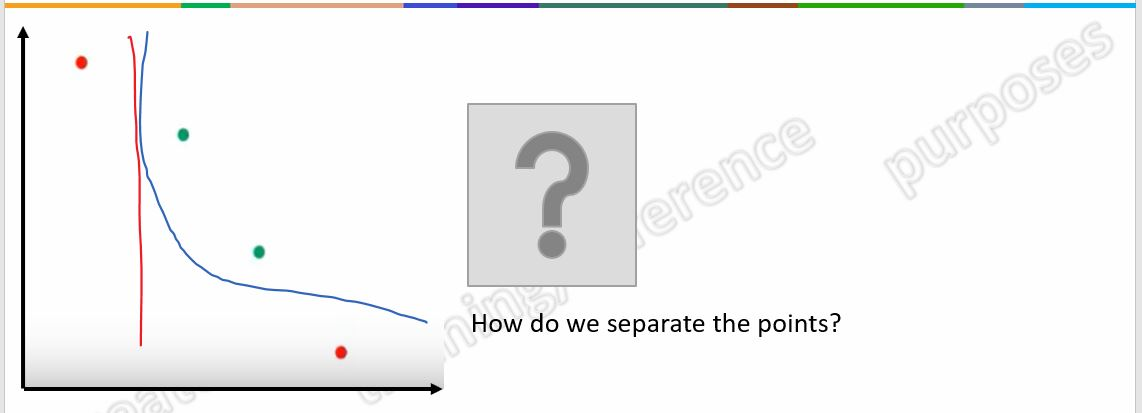

In [59]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\svm-07.JPG', width=600)

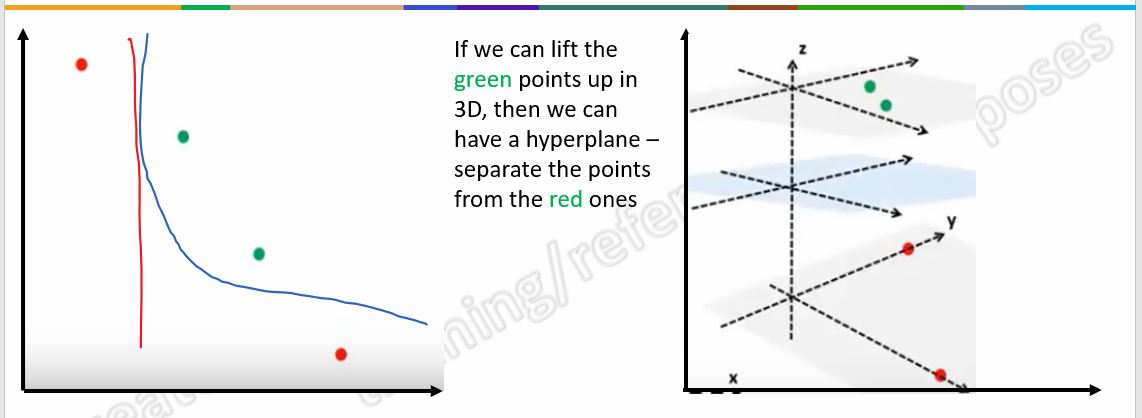

In [60]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\svm-08.JPG', width=600)

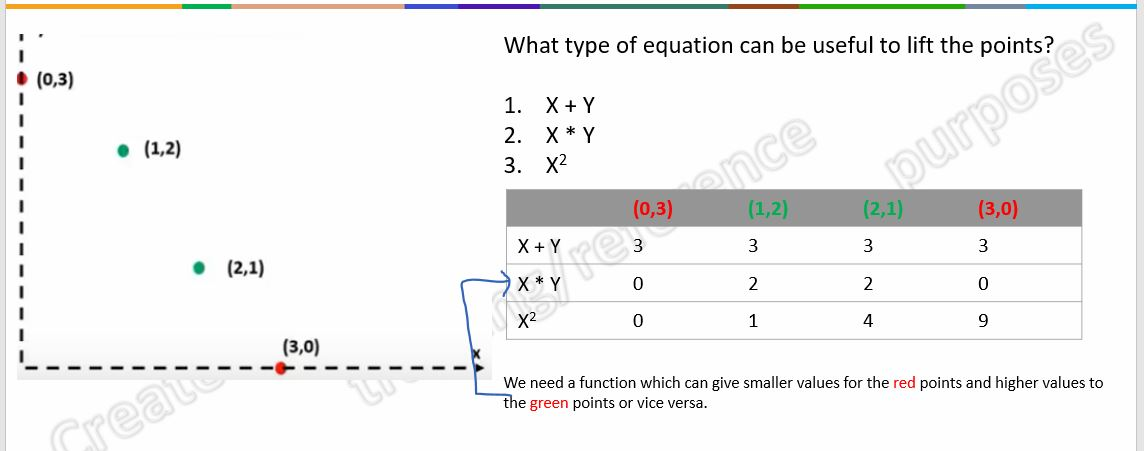

In [61]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\svm-09.JPG', width=600)

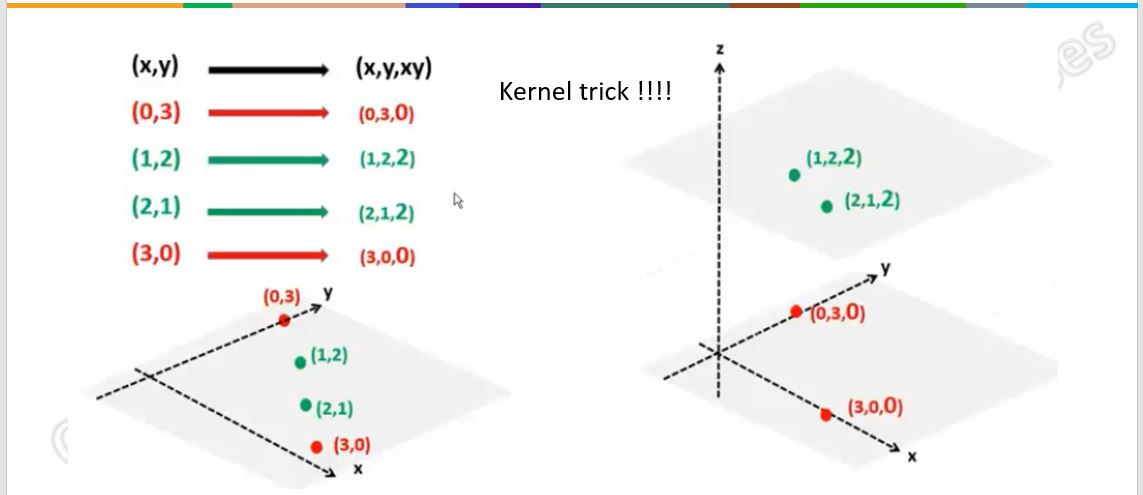

In [62]:
Image(r'D:\MYLEARN\2-ANALYTICS-DataScience\icons-images\svm-10.JPG', width=600)

In [34]:
import numpy as np

# import plotting libraries
import matplotlib.pyplot as plt

In [35]:
X = np.array([[0,3], 
              [1,2],
              [2,1],
              [3,0]])
X

array([[0, 3],
       [1, 2],
       [2, 1],
       [3, 0]])

In [36]:
y = np.array([0, 1, 1, 0])

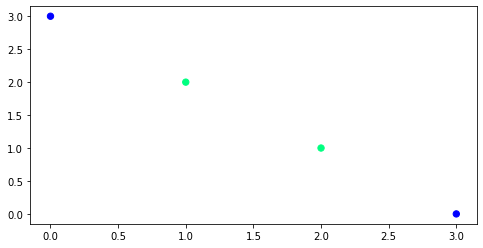

In [37]:
%matplotlib inline
plt.figure(figsize=(8, 4))

xs = X[:, 0]
ys = X[:, 1]

# all the training points
plt.scatter(xs, ys, s=40, c=y, marker='o', cmap='winter'); 

In [38]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [39]:
X = np.array([[0,3, 0], 
              [1,2, 2],
              [2,1, 2],
              [3,0, 0]])
X

array([[0, 3, 0],
       [1, 2, 2],
       [2, 1, 2],
       [3, 0, 0]])

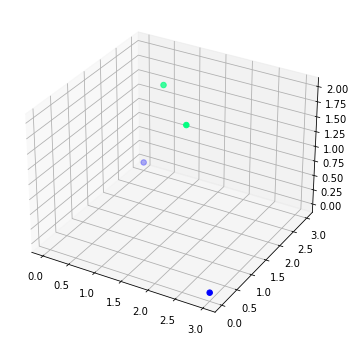

In [40]:
%matplotlib inline

# plot the data points
fig = plt.figure(figsize=(8, 6))

ax = fig.add_subplot(111, projection='3d')

xs = X[:, 0]
ys = X[:, 1]
zs = X[:, 2]

# all the training points
ax.scatter(xs, ys, zs, s=30, c=y, marker='o', cmap='winter') ;